## Visualizing Two Variable Functions

We wil make the surface plots of two variable functions of the form $z = f(x,y)$ and generate animation with rotating azimuth angle in the 3D surface plot using python, matplotlib.pyplot, and matplotlib.animation.FuncAnimation.

<img src="./images/two_variable_functions.png" style="width: 350px;"/> 



In [1]:
#%matplotlib inline  # This displayes static plots in jupytrer environment.
%matplotlib notebook 
                     # Use this to enable 3D plot interactive.  
                     # Don't combine this with %matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

### Basic Surface Plot

**Example 1.** Plot $f(x,y) = \sqrt{x}+\sqrt{y}$.

In [2]:
# Make datax 
x = y = np.linspace(0., 5., 41)
xv, yv = np.meshgrid(x, y, indexing='ij', sparse=False)

fv = np.sqrt(xv)+np.sqrt(yv)  

<IPython.core.display.Javascript object>


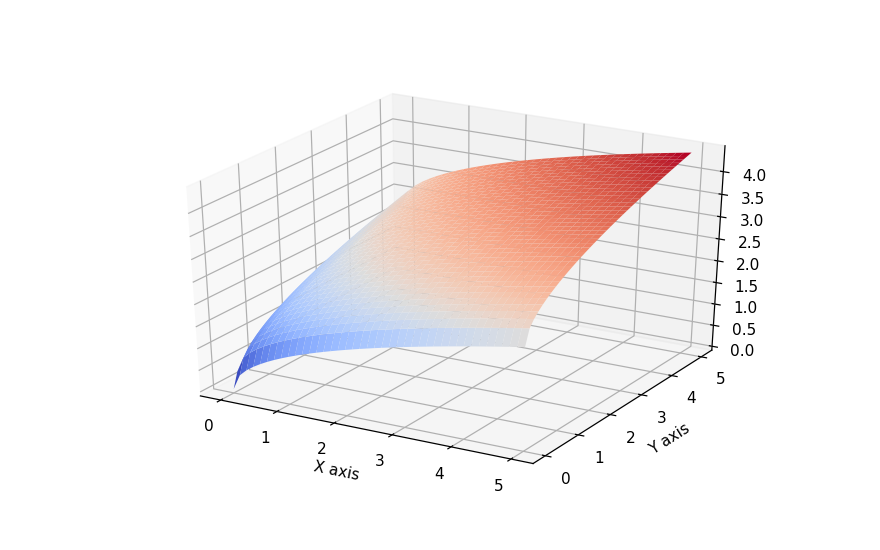

Text(0.5, 0, 'Y axis')

In [3]:
# Get instance of Axis3D
fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')

# Plot the surface
ax.plot_surface(xv, yv, fv, cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
#ax.set_zlabel('Z axis')

### Animate a rotating 3D graph in matplotlib

* [Source](https://pythonmatplotlibtips.blogspot.com/2018/01/rotate-azimuth-angle-animation-3d-python-matplotlib-pyplot.html)

<IPython.core.display.Javascript object>


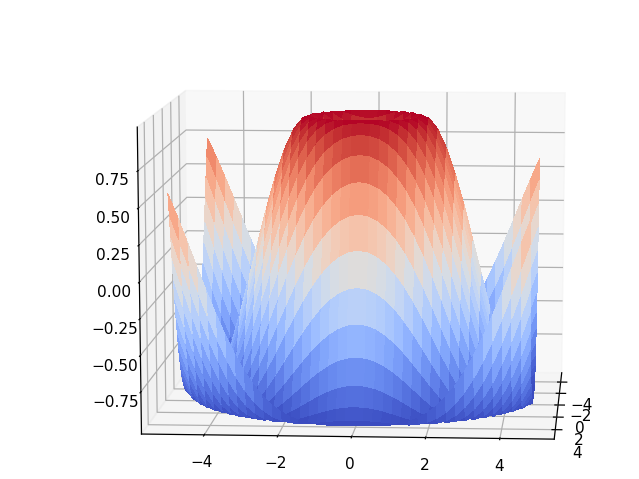

In [4]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

def init():
    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)


In [7]:
fn = 'rotate_azimuth_angle_3d_surf'
#filename_mp4='animation/'+fn+'.mp4'
filename_gif='animation/'+fn+'.gif'
#ani.save(filename_mp4,writer='ffmpeg',fps=1000/50)
ani.save(filename_gif,writer='imagemagick',fps=1000/50)

In [ ]:
## This doesn't work on jupyeter 
#import subprocess
#cmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)
#subprocess.check_output(cmd)

## This works on command line only
##convert rotate.gif -fuzz 5% -layers Optimize rotater.gif
##magick "rotate.gif" -fuzz 5% -layers Optimize "rotater.gif"

In [ ]:
#plt.rcParams['animation.html'] = 'html5'
#ani

### Resources

 1. [Animations with Matplotlib](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)